# Mandatory Assignment 3
## Exercise 1

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5350 - loss: 1.5731 - val_accuracy: 0.7250 - val_loss: 0.9621
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.6004 - val_accuracy: 0.8150 - val_loss: 0.6821
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.3469 - val_accuracy: 0.8050 - val_loss: 0.6326
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2382 - val_accuracy: 0.8200 - val_loss: 0.6323
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.1736 - val_accuracy: 0.8150 - val_loss: 0.6458
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.1289 - val_accuracy: 0.8100 - val_loss: 0.6636
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0954 - val_accuracy: 0.8150 - val_loss: 0.6856
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0697 - val_accuracy: 0.8250 - val_loss:

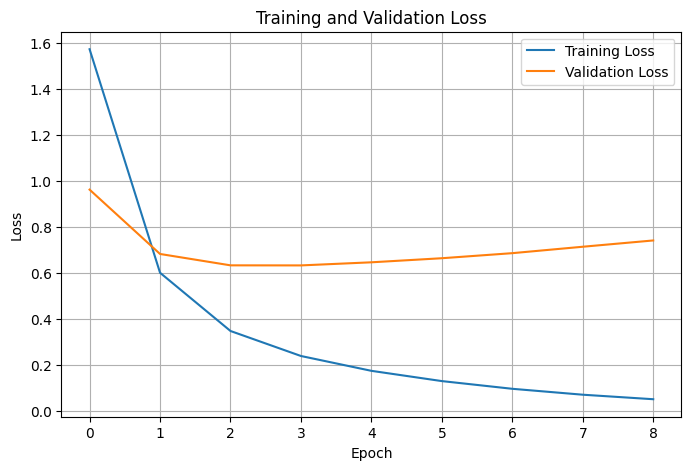

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, optimizers, initializers, models
import matplotlib.pyplot as plt
import numpy as np
import os, random

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 2. Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[:1000].reshape(1000, 28*28).astype("float32") / 255.0
x_test = x_test[:200].reshape(200, 28*28).astype("float32") / 255.0
y_train = y_train[:1000]
y_test = y_test[:200]

# 3. Build the model
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. EarlyStopping callback
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# 6. Train
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 7. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

# 8. Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 2

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1523 - loss: 3.3702 - val_accuracy: 0.2160 - val_loss: 2.1738
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2592 - loss: 2.0195 - val_accuracy: 0.2230 - val_loss: 2.0800
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3135 - loss: 1.9014 - val_accuracy: 0.2550 - val_loss: 2.0576
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 1.8189 - val_accuracy: 0.2830 - val_loss: 2.0422
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3738 - loss: 1.7576 - val_accuracy: 0.3180 - val_loss: 1.9814
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 1.7034 - val_accuracy: 0.3240 - val_loss: 1.9167
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4053 - loss: 1.6519 - val_accuracy: 0.3480 - val_loss: 1.8721
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4240 - loss: 1.6039 - val_accuracy: 0.3620 - val_loss:

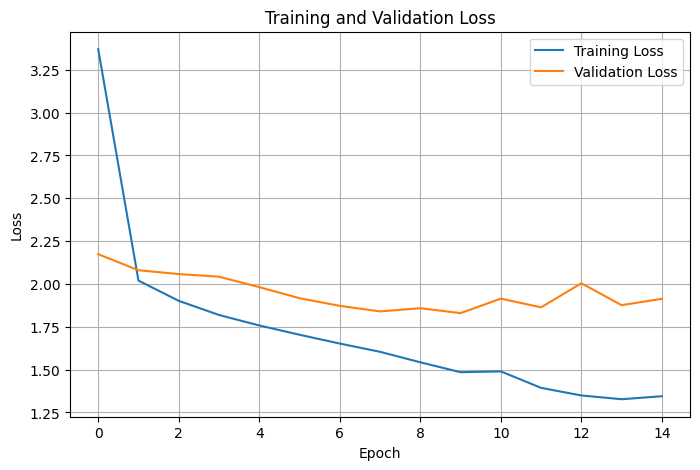

In [14]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

#Same thing as in MINST, just a little different parameters
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train[:5000].reshape(5000, 32*32*3).astype("float32") / 255.0
x_test = x_test[:1000].reshape(1000, 32*32*3).astype("float32") / 255.0
y_train = y_train[:5000].flatten()
y_test = y_test[:1000].flatten()

model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 3

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2300 - loss: 2.3075 - val_accuracy: 0.7150 - val_loss: 0.9913
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.3829 - val_accuracy: 0.8050 - val_loss: 0.6804
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.9354 - val_accuracy: 0.8100 - val_loss: 0.6099
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.7433 - val_accuracy: 0.8250 - val_loss: 0.5806
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.6620 - val_accuracy: 0.8400 - val_loss: 0.6038
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.5963 - val_accuracy: 0.8400 - val_loss: 0.5961
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4823 - val_accuracy: 0.8550 - val_loss: 0.5860
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.4085 - val_accuracy: 0.8400 - val_loss:

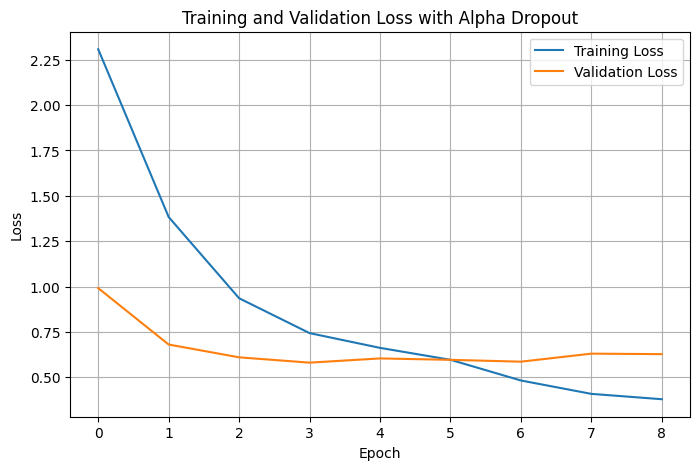

In [15]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[:1000].reshape(1000, 28*28).astype("float32") / 255.0
x_test = x_test[:200].reshape(200, 28*28).astype("float32") / 255.0
y_train = y_train[:1000]
y_test = y_test[:200]

#Task specifications
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(10, activation='softmax')
])

optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy with Alpha Dropout: {test_acc * 100:.2f}%")

mc_passes = 20
predictions = np.zeros((len(x_test), 10))

for i in range(mc_passes):
    preds = model(x_test, training=True)
    predictions += preds.numpy()

predictions /= mc_passes
mc_accuracy = np.mean(np.argmax(predictions, axis=1) == y_test)

print(f"MC Dropout averaged test accuracy (20 passes): {mc_accuracy * 100:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Alpha Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 4

C:\Users\Gdwni\AppData\Local\Temp\ipykernel_24424\1251530930.py:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1781 - loss: 2.2601 - val_accuracy: 0.2525 - val_loss: 2.2050
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2681 - loss: 2.1487 - val_accuracy: 0.3000 - val_loss: 2.1139
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2981 - loss: 2.0508 - val_accuracy: 0.2925 - val_loss: 2.0482
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3131 - loss: 1.9759 - val_accuracy: 0.2825 - val_loss: 2.0082
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3338 - loss: 1.9250 - val_accuracy: 0.2950 - val_loss: 1.9838

Test accuracy: 25.80%


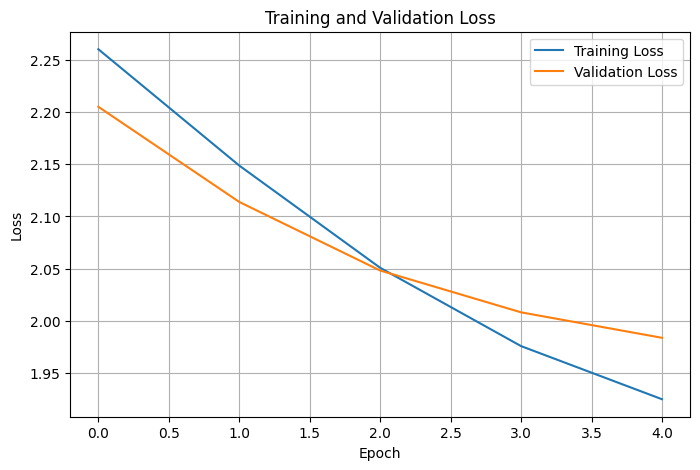

In [ ]:
from tensorflow.keras.applications import MobileNetV2

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train[:2000].astype("float32") / 255.0
x_test  = x_test[:500].astype("float32") / 255.0
y_train = y_train[:2000].flatten()
y_test  = y_test[:500].flatten()

#task specifications
base_model = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3)
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 5

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2019 - loss: 2.2484 - val_accuracy: 0.1850 - val_loss: 2.2589
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2050 - loss: 2.2286 - val_accuracy: 0.1850 - val_loss: 2.2580
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2087 - loss: 2.2277 - val_accuracy: 0.1850 - val_loss: 2.2519
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2087 - loss: 2.2193 - val_accuracy: 0.1850 - val_loss: 2.2303
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2338 - loss: 2.1474 - val_accuracy: 0.3500 - val_loss: 1.9693
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4475 - loss: 1.6440 - val_accuracy: 0.6075 - val_loss: 1.2308
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6106 - loss: 1.1727 - val_accuracy: 0.6475 - val_loss: 1.0097
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 1.0227 - val_accuracy: 0.7250 - val_loss:

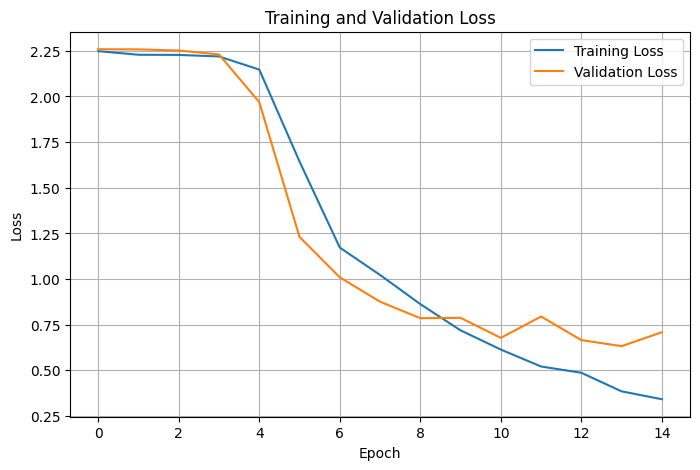

In [ ]:
#used to load the datasets for the 2 next tasks
from scipy.io import loadmat

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Download SVHN
train_data = loadmat('train_32x32.mat')
test_data  = loadmat('test_32x32.mat')

x_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y'].flatten()
x_test  = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test  = test_data['y'].flatten()

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Normalize pixel (grayscale)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#only use first 2000 training samples and first 500 test samples
x_train, y_train = x_train[:2000], y_train[:2000]
x_test, y_test   = x_test[:500], y_test[:500]

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1969 - loss: 2.2455 - val_accuracy: 0.1850 - val_loss: 2.2565
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2272 - val_accuracy: 0.1850 - val_loss: 2.2516
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2221 - val_accuracy: 0.1850 - val_loss: 2.2501
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2201 - val_accuracy: 0.1850 - val_loss: 2.2467
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2169 - val_accuracy: 0.1850 - val_loss: 2.2446
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2144 - val_accuracy: 0.1850 - val_loss: 2.2410
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.2065 - val_accuracy: 0.1850 - val_loss: 2.2345
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2094 - loss: 2.1923 - val_accuracy: 0.1850 - val_loss:

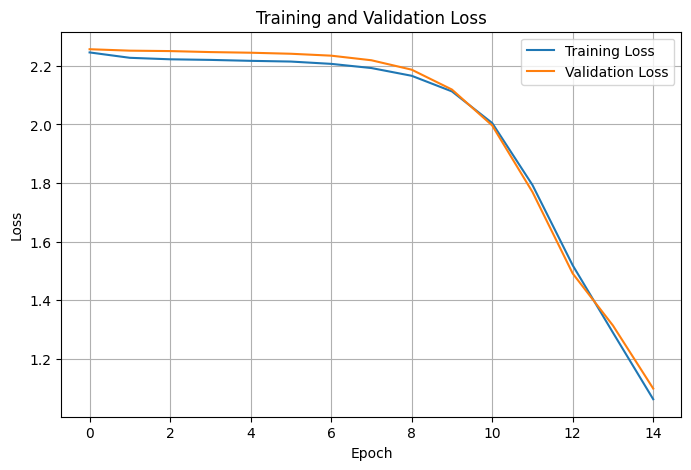

In [24]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

train_data = loadmat('train_32x32.mat')
test_data  = loadmat('test_32x32.mat')

x_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y'].flatten()
x_test  = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test  = test_data['y'].flatten()

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Use only first 2000 training samples and first 500 test samples
x_train, y_train = x_train[:2000], y_train[:2000]
x_test, y_test   = x_test[:500], y_test[:500]

# function cuz i need to build a new model a couple of times in this exercise
def build_model(mc_dropout=False):
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    if mc_dropout:
        for layer in model.layers:
            if isinstance(layer, layers.Dropout):
                layer.training = True

    return model

model = build_model()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

# Q6.1
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nQ6.1 - Plain Test Accuracy (no MC Dropout): {test_acc * 100:.2f}%")

# Q6.2
mc_model = build_model(mc_dropout=True)
mc_model.set_weights(model.get_weights())

T = 20 
predictions = np.zeros((T, len(x_test), 10))

for t in range(T):
    preds = mc_model(x_test, training=True).numpy()
    predictions[t] = preds


mean_preds = np.mean(predictions, axis=0)
var_preds  = np.var(predictions, axis=0)  # predictive variance

# Q6.3
y_pred = np.argmax(mean_preds, axis=1)
mc_accuracy = np.mean(y_pred == y_test)

epistemic_uncertainty = np.mean(var_preds)
epistemic_uncertainty_rounded = round(float(epistemic_uncertainty), 3)

print(f"Q6.2 - MC Dropout Accuracy (avg 20 passes): {mc_accuracy * 100:.2f}%")
print(f"Q6.3 - Average Epistemic Uncertainty (mean predictive variance): {epistemic_uncertainty_rounded:.3f}")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
